### Importing the libraries

In [1057]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
                                                         
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

from imblearn.over_sampling import SMOTE


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Data Reading

In [1058]:
path="/content/drive/MyDrive/YourCabs_training.csv"

In [1059]:
df=pd.read_csv('data_regression.csv')

In [1060]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.350,12.200,16.810,82,1,4.000,1,0.000
1,2015,100643,340-5930,Female,39,149,no,no,294.450,7.700,33.370,87,3,3.000,2,0.000
2,2015,100756,372-3750,Female,65,126,no,no,87.300,11.900,9.890,91,1,4.000,5,1.000
3,2015,101595,331-4902,Female,24,131,no,yes,321.300,9.500,36.410,102,4,3.000,3,0.000
4,2015,101653,351-8398,Female,40,191,no,no,243.000,10.900,27.540,83,7,3.000,1,0.000


### Exploratory Data Analysis and Data Cleaning

In [1061]:
df.shape

(2000, 16)

In [1062]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [1063]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [1064]:
# Dropping the rows with null values for churn
df = df.dropna(axis=0, subset=['churn'])

In [1065]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     26
customer_support_calls     0
churn                      0
dtype: int64

In [1066]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,1965.000,1965.000,1965.000,1965.000,1965.000,1965.000,1965.000,1965.000,1965.000,1939.000,1965.000,1965.000
mean,2015.000,558015.037,38.698,99.751,269.894,10.199,30.589,100.454,4.491,3.250,1.545,0.133
std,0.000,260528.010,10.196,39.888,80.578,2.772,9.132,19.545,2.489,0.805,1.311,0.340
min,2015.000,100198.000,18.000,1.000,0.000,0.000,0.000,42.000,0.000,0.000,0.000,0.000
25%,2015.000,331980.000,32.000,72.000,218.250,8.400,24.740,87.000,3.000,3.000,1.000,0.000
50%,2015.000,576100.000,37.000,99.000,269.550,10.200,30.550,101.000,4.000,3.000,1.000,0.000
75%,2015.000,776079.000,44.000,127.000,324.000,12.000,36.720,114.000,6.000,4.000,2.000,0.000
max,2015.000,999961.000,82.000,243.000,526.200,20.000,59.640,175.000,19.000,6.000,9.000,1.000


In [1067]:
for col in df.columns:
    print('column:{} - Unique values:{}'.format(col,df[col].unique()))
    print(" ")

column:year - Unique values:[2015]
 
column:customer_id - Unique values:[100198 100643 100756 ... 998474 998934 999961]
 
column:phone_no - Unique values:['409-8743' '340-5930' '372-3750' ... '353-2080' '359-7788' '414-1496']
 
column:gender - Unique values:['Female' nan 'Male']
 
column:age - Unique values:[36 39 65 24 40 31 54 61 34 30 23 21 44 45 59 57 32 50 28 37 63 33 35 52
 48 55 41 43 38 26 29 27 56 49 47 42 67 46 64 66 22 51 25 62 53 19 76 60
 75 58 20 74 77 82 80 71 73 18 70 72 69 68 79]
 
column:no_of_days_subscribed - Unique values:[ 62 149 126 131 191  65  59  50 205  63 114 107  84 142 137 100  99 115
 194 104 170  76  94  81 119 138 124  48 106 161  89 105  67 129  56  95
  37  80 190 168 166  42  96  77  54  41  53  98  90 146  51  97  55  74
  86  75  27 163  44  92  45 140 122 132 134 109  21 167  35 177 118  87
 103 135 144 148  70  16  83  72  30  93  91 110 128  38  64 172  82  39
 108  66 162  10 156 101  68 111 112 127  61 158 192 136 116  49  40 130
 125   9  57 

In [1068]:
df['gender'].value_counts()

Male      1032
Female     909
Name: gender, dtype: int64

In [1069]:
df['churn'].value_counts()

0.000    1703
1.000     262
Name: churn, dtype: int64

In [1070]:
print("Proportion:", round(df['churn'].value_counts()[0]/df['churn'].value_counts()[1],2),':1')

Proportion: 6.5 :1


In [1071]:
df['churn'].value_counts()[0]

1703

In [1072]:
df_churned = df[df['churn']==1]
df_notchurned = df[df['churn']==0]

In [1073]:
# Churned male and female users

df_churned['gender'].value_counts()  

Male      134
Female    126
Name: gender, dtype: int64

In [1074]:
df=df.drop(columns=['year','customer_id','phone_no'],axis=1)

Dropping the year and customer_id columns as these are not helpful in predicting whether the customer will churn or not.

In [1075]:
df['gender'].value_counts()

Male      1032
Female     909
Name: gender, dtype: int64

In [1076]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

Filling the null values in gender column with mode

In [1077]:
df['maximum_days_inactive']=df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].mean())

Filling the null values in maximum_days_inactive column with mean

In [1078]:
df['maximum_days_inactive'] = df['maximum_days_inactive'].apply(np.int64)

In [1079]:
df['churn'].value_counts()

0.000    1703
1.000     262
Name: churn, dtype: int64

### Data visualization

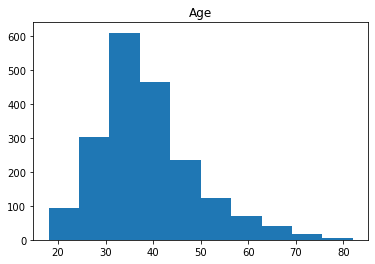

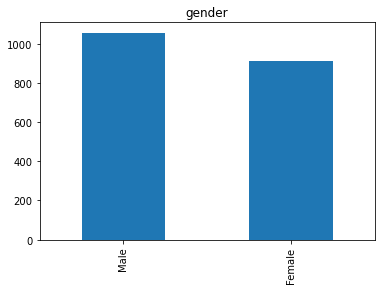

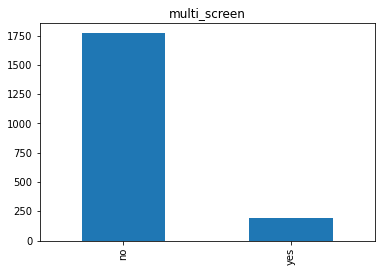

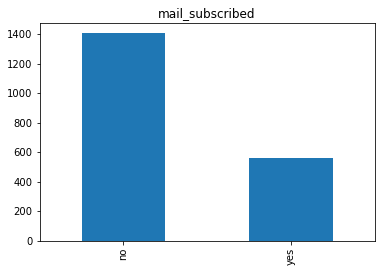

In [1080]:
plt.hist(df['age'])
plt.title('Age')
plt.show()


for col in df.columns:
    if df[col].dtype=='object':
        df[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()

In [1081]:
# Dropping the target columns
target=df[['churn']]

In [1082]:
df=df.drop(['churn'],axis=1)

In [1083]:
#Creating a label encoder object
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
            le.fit(df[col])
            df[col] = le.transform(df[col])

In [1084]:
# min-max normalization (numeric variables)
min_max_columns = ['age','no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins','maximum_daily_mins',
                  'weekly_max_night_mins','videos_watched','maximum_days_inactive','customer_support_calls']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df[column].min()
        # maximum value of the column
        max_column = df[column].max()
        # min max scaler
        df[column] = (df[column] - min_column) / (max_column - min_column)   


#### Train-test split

In [1085]:
# select independent variables
X = df

# select dependent variables
y = target

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.columns)

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls'],
      dtype='object')
Index(['churn'], dtype='object')


In [1086]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=40)

In [1087]:
X_train.shape

(1572, 12)

In [1088]:
X_test.shape

(393, 12)

### Model evaluation with imbalanced data

In [1089]:
base_lr=LogisticRegression(random_state=4)
base_lr_model=base_lr.fit(X_train,y_train)

In [1090]:
base_lr_pred=base_lr_model.predict(X_test)

In [1091]:
# Calculate Accuracy, Precision, Recall, and F1 score
base_lr_accuracy = accuracy_score(y_test, base_lr_pred)
base_lr_precision = precision_score(y_test, base_lr_pred)
base_lr_recall = recall_score(y_test, base_lr_pred)
base_lr_f1 = f1_score(y_test,base_lr_pred)



# Calculate AUC score
base_lr_probs = base_lr.predict_proba(X_test)
base_lr_probs = base_lr_probs[:,1]
base_lr_auc = roc_auc_score(y_test, base_lr_probs)


# Display the metrics
print("Logistic Regression: Imbalanced Data")
print(" - Accuracy : ",'{:.3f}'.format(base_lr_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_lr_precision))
print(" - Recall   : ",'{:.3f}'.format(base_lr_recall))
print(" - F1 score : ",'{:.3f}'.format(base_lr_f1))
print(" - AUC score: ",'{:.3f}'.format(base_lr_auc))


# Display the confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,base_lr_pred))

Logistic Regression: Imbalanced Data
 - Accuracy :  0.858
 - Precision:  0.643
 - Recall   :  0.150
 - F1 score :  0.243
 - AUC score:  0.816
Confusion Matrix
[[328   5]
 [ 51   9]]


In [1092]:
# Initiate the model
base_xgb = XGBClassifier()
# Fit the model
base_xgb_model = base_xgb.fit(X_train, y_train)
# Make Predictions
base_xgb_pred = base_xgb_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
base_xgb_accuracy = metrics.accuracy_score(y_test, base_xgb_pred)
base_xgb_precision = metrics.precision_score(y_test, base_xgb_pred)
base_xgb_recall = metrics.recall_score(y_test, base_xgb_pred)
base_xgb_f1 = f1_score(y_test,base_xgb_pred)

# Calculate AUC score
base_xgb_probs = base_xgb.predict_proba(X_test)
base_xgb_probs = base_xgb_probs[:,1]
base_xgb_auc = roc_auc_score(y_test, base_xgb_probs)

# Display the metrics
print("XGBoost Classifier: Imbalanced Data")
print(" - Accuracy : ",'{:.3f}'.format(base_xgb_accuracy))
print(" - Precision: ",'{:.3f}'.format(base_xgb_precision))
print(" - Recall   : ",'{:.3f}'.format(base_xgb_recall))
print(" - F1 score : ",'{:.3f}'.format(base_xgb_f1))
print(" - AUC score: ",'{:.3f}'.format(base_xgb_auc))

# Display the confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,base_xgb_pred))

XGBoost Classifier: Imbalanced Data
 - Accuracy :  0.903
 - Precision:  0.739
 - Recall   :  0.567
 - F1 score :  0.642
 - AUC score:  0.866
Confusion Matrix
[[321  12]
 [ 26  34]]


### SMOTE

In [1093]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Model evaluation with SMOTE

In [1094]:
smote_lr =LogisticRegression(random_state=4)
smote_lr_model =smote_lr.fit(x_train_smote,y_train_smote)

In [1095]:
smote_lr_pred=smote_lr_model.predict(X_test)

In [1096]:
# Calculate Accuracy, Precision, Recall, and F1 score
smote_lr_accuracy = accuracy_score(y_test, smote_lr_pred)
smote_lr_precision = precision_score(y_test, smote_lr_pred)
smote_lr_recall = recall_score(y_test, smote_lr_pred)
smote_lr_f1 = f1_score(y_test,smote_lr_pred)


# Calculate AUC score
smote_lr_probs = smote_lr.predict_proba(X_test)
smote_lr_probs = smote_lr_probs[:,1]
smote_lr_auc = roc_auc_score(y_test, smote_lr_probs)


# Display the metrics
print("Logistic Regression: SMOTE")
print(" - Accuracy : ",'{:.3f}'.format(smote_lr_accuracy))
print(" - Precision: ",'{:.3f}'.format(smote_lr_precision))
print(" - Recall   : ",'{:.3f}'.format(smote_lr_recall))
print(" - F1 score : ",'{:.3f}'.format(smote_lr_f1))
print(" - AUC score: ",'{:.3f}'.format(smote_lr_auc))


# Display the confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,smote_lr_pred))

Logistic Regression: SMOTE
 - Accuracy :  0.738
 - Precision:  0.336
 - Recall   :  0.733
 - F1 score :  0.461
 - AUC score:  0.809
Confusion Matrix
[[246  87]
 [ 16  44]]


In [1097]:
# Initiate the model
smote_xgb = XGBClassifier()
# Fit the model
smote_xgb_model = smote_xgb.fit(x_train_smote, y_train_smote)
# Make Predictions
smote_xgb_pred = smote_xgb_model.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 score
smote_xgb_accuracy = metrics.accuracy_score(y_test, smote_xgb_pred)
smote_xgb_precision = metrics.precision_score(y_test, smote_xgb_pred)
smote_xgb_recall = metrics.recall_score(y_test, smote_xgb_pred)
smote_xgb_f1 = f1_score(y_test,smote_xgb_pred)

# Calculate AUC score
smote_xgb_probs = smote_xgb.predict_proba(X_test)
smote_xgb_probs = smote_xgb_probs[:,1]
smote_xgb_auc = roc_auc_score(y_test, smote_xgb_probs)

# Display the metrics
print("XGBoost Classifier: SMOTE")
print(" - Accuracy : ",'{:.3f}'.format(smote_xgb_accuracy))
print(" - Precision: ",'{:.3f}'.format(smote_xgb_precision))
print(" - Recall   : ",'{:.3f}'.format(smote_xgb_recall))
print(" - F1 score : ",'{:.3f}'.format(smote_xgb_f1))
print(" - AUC score: ",'{:.3f}'.format(smote_xgb_auc))

# Display the confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,smote_xgb_pred))

XGBoost Classifier: SMOTE
 - Accuracy :  0.911
 - Precision:  0.766
 - Recall   :  0.600
 - F1 score :  0.673
 - AUC score:  0.883
Confusion Matrix
[[322  11]
 [ 24  36]]


### Summary of Results

In [1098]:
# Create Results Table: Accuracy 
pd.options.display.float_format = '{:.3f}'.format

acc_list = [[base_lr_accuracy, base_xgb_accuracy],
    [smote_lr_accuracy, smote_xgb_accuracy]]

acc_df = pd.DataFrame(acc_list)
acc_df.index = ['BASE','SMOTE']
acc_df.columns = ['Logistic Regression','XGBoost']   

# Create Results Table: Recall
rec_list = [[base_lr_recall, base_xgb_recall],
    [smote_lr_recall, smote_xgb_recall]]

rec_df = pd.DataFrame(rec_list)
rec_df.index = ['BASE','SMOTE']
rec_df.columns = ['Logistic Regression','XGBoost']

# Create Results Table: F1
f1_list = [[base_lr_f1, base_xgb_f1],
    [smote_lr_f1, smote_xgb_f1]]


f1_df = pd.DataFrame(f1_list)
f1_df.index = ['BASE','SMOTE']
f1_df.columns = ['Logistic Regression','XGBoost']

# Create Results Table: AUC
auc_list = [[base_lr_auc, base_xgb_auc],
    [smote_lr_auc, smote_xgb_auc]]

auc_df = pd.DataFrame(auc_list)
auc_df.index = ['BASE','SMOTE']
auc_df.columns = ['Logistic Regression','XGBoost']

In [1099]:
print("Accuracy")
acc_df

Accuracy


,Logistic Regression,XGBoost
BASE,0.858,0.903
SMOTE,0.738,0.911


In [1100]:
print("Recall")
rec_df

Recall


,Logistic Regression,XGBoost
BASE,0.150,0.567
SMOTE,0.733,0.600


In [1101]:
print("F1 score")
f1_df

F1 score


,Logistic Regression,XGBoost
BASE,0.243,0.642
SMOTE,0.461,0.673


In [1102]:
print("AUC")
auc_df

AUC


,Logistic Regression,XGBoost
BASE,0.816,0.866
SMOTE,0.809,0.883


### ROC Curve

In [1103]:
ns_probs = [0 for _ in range(len(y_test))]

prob_lm = base_lr_model.predict_proba(X_test)
prob_lm = prob_lm[:,1]


prob_xgb = base_xgb_model.predict_proba(X_test)
prob_xgb = prob_xgb[:,1]

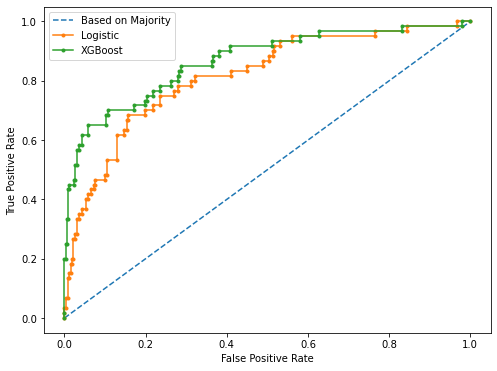

In [1104]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_lm)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Based on Majority')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()